## 이동 평균과 이동 표준 편차를 사용한 이상치 탐지 실습

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)

# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})
data.head()

,Date,Value
0,2023-01-01,-0.615120
1,2023-01-02,-0.039936
2,2023-01-03,-0.921934
3,2023-01-04,-1.507644
4,2023-01-05,-2.936953


### 이동 평균과 이동 표준편차 계산

In [3]:
window_size = 7
data['MovingAverage'] = data['Value'].rolling(window=window_size).mean()
data['MovingStd'] = data['Value'].rolling(window=window_size).std()

print(data['MovingAverage'].tail())
print(data['MovingStd'].tail())

495   -0.293054
496   -0.223375
497   -0.274001
498   -0.459356
499   -0.331579
Name: MovingAverage, dtype: float64
495    0.885827
496    0.993519
497    1.014969
498    1.302911
499    1.215602
Name: MovingStd, dtype: float64


### 임계값 설정, 이상치 탐지

In [4]:
threshold_multiplier = 2 # 임계값 계수
data['Threshold'] = data['MovingAverage'] + threshold_multiplier * data['MovingStd']
print(data['Threshold'].tail())

# 이상치 탐지 -> 임계값을 초과하는 경우는 True(이상치)로 설정합니다
data['Outlier'] = data['Value'] > data['Threshold']
print(data['Outlier'].unique())

495    1.478600
496    1.763664
497    1.755938
498    2.146466
499    2.099625
Name: Threshold, dtype: float64
[False  True]


### 시각화

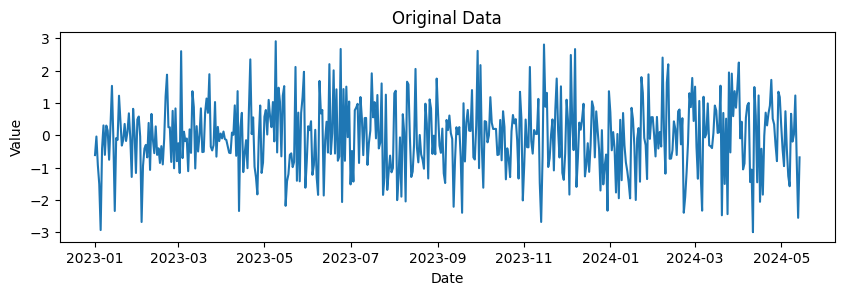

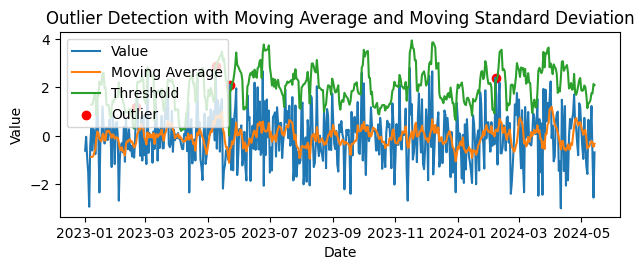

In [5]:
# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')
plt.show()

# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threshold'], label='Threshold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()
plt.tight_layout()